<a href="https://colab.research.google.com/github/suencheah/Python---Imaging-and-Special-Effects/blob/main/ISE-GoogleColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

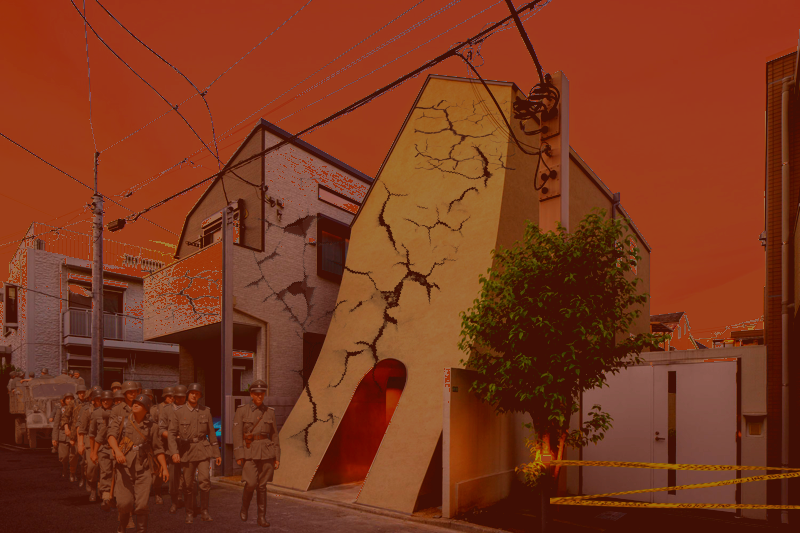

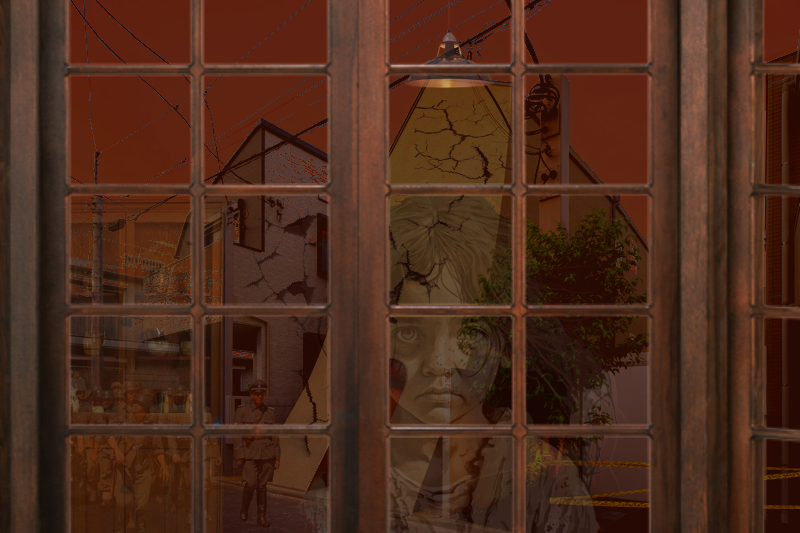

In [ ]:

from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import numpy as np

street = Image.open('photos/tokyo street 1.jpg').convert("RGBA")
street.thumbnail((800,800))

# image enhancement
enhancer = ImageEnhance.Contrast(street)
street = enhancer.enhance(1.5)  # Adjust the factor for desired contrast


# Add the objects
crack1 = Image.open('photos/crack1.png').convert("RGBA")
crack1 = crack1.resize((70,130))
enhancer = ImageEnhance.Brightness(crack1)
crack1 = enhancer.enhance(0.2)
crack1 = crack1.rotate(-90, expand=True)

crack1a = Image.open('photos/crack1.png').convert("RGBA")
crack1a = crack1a.resize((50,100))
enhancer = ImageEnhance.Brightness(crack1a)
crack1a = enhancer.enhance(0.2)
crack1a = crack1a.rotate(90, expand=True)

crack2 = Image.open('photos/crack2.png').convert("RGBA")
crack2.thumbnail((130,400))
enhancer = ImageEnhance.Brightness(crack2)
crack2 = enhancer.enhance(0.2)
crack2 = crack2.rotate(30, expand=True)

crack3 = Image.open('photos/crack3.png').convert("RGBA")
crack3.thumbnail((150,400))
enhancer = ImageEnhance.Brightness(crack3)
crack3 = enhancer.enhance(0.5)
crack3 = crack3.rotate(-20, expand=True)

tape = Image.open('photos/police tape2.png').convert("RGBA")
tape = tape.resize((280,50))
enhancer = ImageEnhance.Brightness(tape)
tape = enhancer.enhance(0.9)

troops = Image.open('photos/troops.png').convert("RGBA")
troops.thumbnail((300,300))
troops = troops.transpose(Image.FLIP_LEFT_RIGHT)
enhancer = ImageEnhance.Brightness(troops)
troops = enhancer.enhance(0.8)

street.paste(crack1, (400, 100), crack1)
street.paste(crack1a, (130, 270), crack1a)
street.paste(crack2, (200, 150), crack2)
street.paste(crack3, (240, 100), crack3)
street.paste(tape, (550, 460), tape)
street.paste(troops, (0, 340), troops)

# Make the sky burning red
image_array = np.array(street)
sky_mask = (image_array[:, :, 2] > 180) & (image_array[:, :, 0] > 150) & (image_array[:, :, 1] > 150)
mask = Image.fromarray((sky_mask * 255).astype('uint8')).convert('L')
overlay = Image.new("RGBA", street.size, (255, 47, 0))
street = Image.composite(Image.blend(street, overlay, 0.6), street, mask)

# Applying red filter to remaining image
street = Image.composite(Image.blend(street, overlay, 0.2), street, street)

# Enhance contrast and saturation to add to the dramatic effect
contrast_enhancer = ImageEnhance.Contrast(street)
street = contrast_enhancer.enhance(0.8)
saturation_enhancer = ImageEnhance.Color(street)
street = saturation_enhancer.enhance(2)

enhancer = ImageEnhance.Brightness(street)
street = enhancer.enhance(1.2)

# Apply sepia filter
gray_image = ImageOps.grayscale(street)
sepia_image = ImageOps.colorize(gray_image, black="#000000", white="#14120f")
enhancer = ImageEnhance.Contrast(sepia_image)
enhanced_sepia_image = enhancer.enhance(1.3)
street = Image.blend(street.convert("RGB"), sepia_image, 0.4)

display(street)
street.save('output/army_on_the_street.jpg')

# Create the illusion of a girl looking outside from her house by putting a  girl's reflection in the window
window = Image.open("photos/window.png").convert("RGBA")
window = window.resize(street.size)

window = window.crop((200,150,window.width-150,window.height-70))
window = window.resize(street.size)

girl = Image.open("photos/girl.png").convert("RGBA")
girl.thumbnail((370,370))
enhancer = ImageEnhance.Brightness(girl)
girl = enhancer.enhance(0.4)
girl_silhoutte = girl

reflection_alpha = girl.split()[3]  # Get the alpha channel (transparency)
reflection_alpha = reflection_alpha.point(lambda p: p * 0.7)  # Decrease the opacity
girl.putalpha(reflection_alpha)

hangingLight = Image.open("photos/hanging light.png").convert("RGBA")
hangingLight.thumbnail((100,100))
hangingLight = hangingLight

reflection_alpha = hangingLight.split()[3]  # Get the alpha channel (transparency)
reflection_alpha = reflection_alpha.point(lambda p: p * 0.8)  # Decrease the opacity
hangingLight.putalpha(reflection_alpha)

cupboard = Image.open("photos/cupboard.png").convert("RGBA")
cupboard.thumbnail((400,400))
enhancer = ImageEnhance.Brightness(cupboard)
cupboard = enhancer.enhance(0.6)

reflection_alpha = cupboard.split()[3]  # Get the alpha channel (transparency)
reflection_alpha = reflection_alpha.point(lambda p: p * 0.7)  # Decrease the opacity
cupboard.putalpha(reflection_alpha)


reflection_in_window = Image.new("RGBA", window.size, (0, 0, 0, 100))
reflection_in_window.paste(girl, (270, (reflection_in_window.height-girl.height)), girl.split()[3])
reflection_in_window.paste(hangingLight, (400, 0), hangingLight.split()[3])
reflection_in_window.paste(cupboard, (0, (reflection_in_window.height-cupboard.height+50)), cupboard.split()[3])
reflection_in_window.paste(window, (0, 0), window.split()[3])

street.paste(reflection_in_window, (0, 0), reflection_in_window)

display(street)


street.save('output/girl_looking_out.jpg')



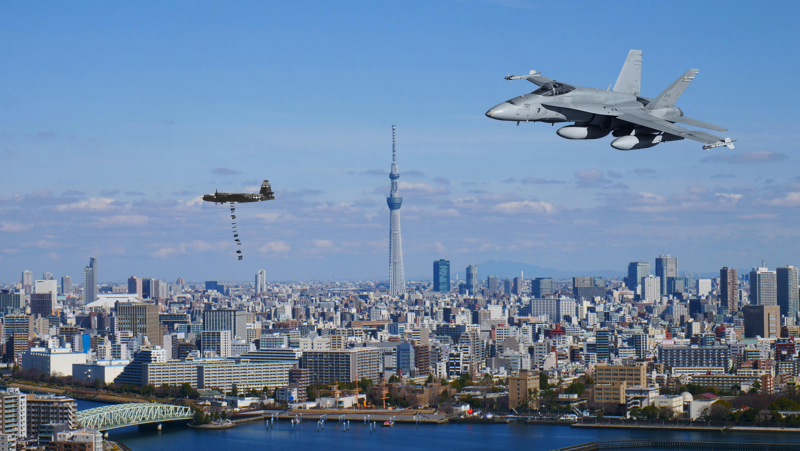

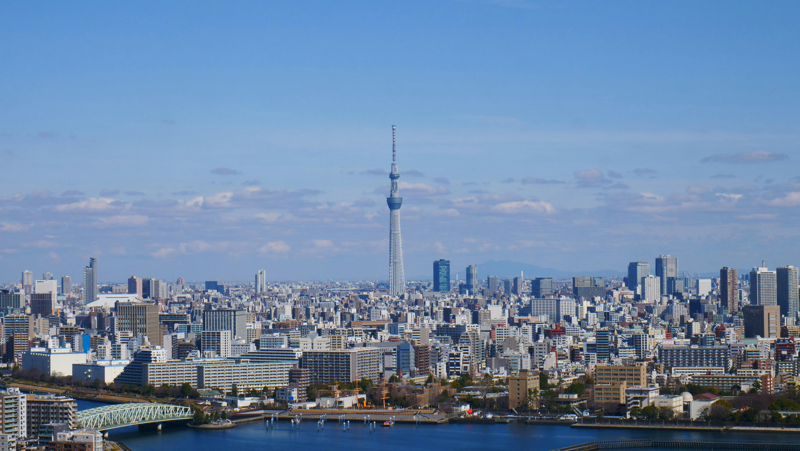

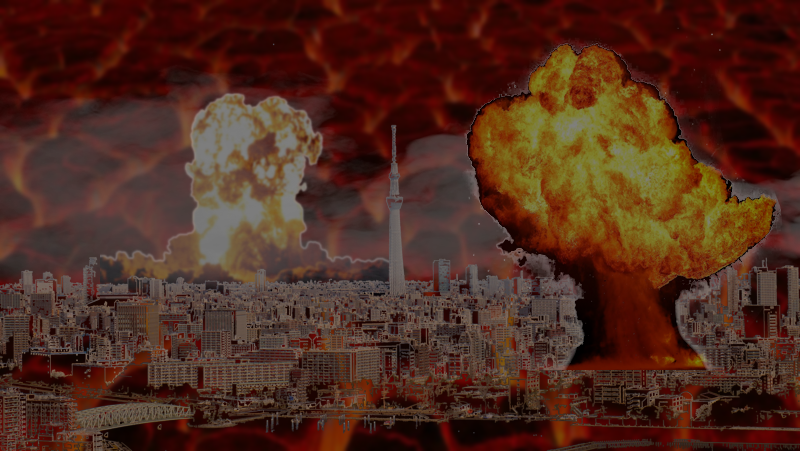

In [ ]:
# CITY BIRD'S EYE VIEW WHEN GETTING NUKED

from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import numpy as np
import imageio
import random
import math
import cv2

# GET BUILDINGS MASK OF THE TOKYO IMAGE
tokyo = cv2.imread('photos/cityscape of tokyo.jpg')
gray = cv2.cvtColor(tokyo, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, threshold1=50, threshold2=150) # Apply edge detection (e.g., Canny edge detection)
kernel = np.ones((5, 5), np.uint8) # Use dilation to make the mask solid (fills gaps)
mask = cv2.dilate(edges, kernel, iterations=1)
mask = cv2.bitwise_not(mask) # Invert the mask so that buildings are white and sky is black
mask_pil = Image.fromarray(mask) # Convert the mask to a format usable by PIL
mask_pil.save('output/buildings_mask.png') # Save the mask if needed

# CREATE DURING BOMBING IMAGE
tokyo = Image.open('photos/cityscape of tokyo.jpg')
during_bomb = tokyo
during_bomb.thumbnail((800,800))

bomber = Image.open('photos/bomber 2.png').convert("RGBA")
bomber.thumbnail((80, 80))
during_bomb.paste(bomber, (200, 180), bomber)

droppedBomb = Image.open('photos/drop bomb.png').convert("RGBA")
droppedBomb.thumbnail((80,80))
droppedBomb = droppedBomb.rotate(-68, expand=True)
bomb_drop_start_y = (570, 130)
bomb_drop_end = (570, 300)

jetFighter = Image.open('photos/jet fighter.png').convert("RGBA")
jetFighter.thumbnail((280,280))
during_bomb.paste(jetFighter, (470, 10), jetFighter)

display(during_bomb)
during_bomb.save('output/during_bomb.jpg')

# ADD BOMB DROP AND EXPLOSION ANIMATION TO DURING BOMBING IMAGE
num_frames = 30
fall_speed = 10
bomb_start_x = 570
bomb_start_y = 130
bomb_stop_y = 300

frames = []

for i in range(num_frames):
    # Create a new frame by copying the base image
    frame = during_bomb.copy()

    # Calculate the current y position of the bomb (falling downwards)
    current_y_position = bomb_start_y + (i * fall_speed)

    # If the bomb has reached the stopping point, stop moving it further
    if current_y_position >= bomb_stop_y:
        current_y_position = bomb_stop_y

    # Paste the bomb image onto the frame at the specified starting x position and calculated y position
    frame.paste(droppedBomb, (bomb_start_x, current_y_position), droppedBomb)

    # Append the frame to the list
    frames.append(frame)


# Add Explosion animation
explosion = Image.open('photos/bomb (2).png').convert("RGBA")
explosion = explosion.resize((200, 200))

explosion1_start_x = 520
explosion1_stop_y = 300
num_frames = 20  # Number of frames for the animation
scale_factor = 1.02  # Scale factor for enlargement in each step

for i in range(num_frames):
    # Resize the object incrementally
    new_size = (int(explosion.width * (scale_factor ** i)), int(explosion.height * (scale_factor ** i)))
    resized_object = explosion.resize(new_size, Image.Resampling.LANCZOS)

    # Create a copy of the base image for each frame
    frame = during_bomb.copy()

    # Calculate position to keep the object centered while enlarging
    position = (explosion1_start_x - (new_size[0] - explosion.width) // 2,
                explosion1_stop_y - (new_size[1] - explosion.height) // 2)

    # Paste the resized object onto the frame
    frame.paste(resized_object, position, resized_object)

    # Append the frame to the list
    frames.append(frame)




# CREATE THE HELL TOKYO IMAGE
tokyo = Image.open('photos/cityscape of tokyo.jpg').convert("RGBA")
hell_tokyo = tokyo
hell_tokyo.thumbnail((800, 800))
display(hell_tokyo)

# Decrease brightness
enhancer = ImageEnhance.Brightness(hell_tokyo)
hell_tokyo = enhancer.enhance(0.5)

# Add reddish colour filter
orange_overlay = Image.new("RGBA", hell_tokyo.size, (210, 116, 52))
hell_tokyo = Image.blend(hell_tokyo, orange_overlay, alpha=0.2)

# Create the apocalyptic background
hell_background = Image.open('photos/hell_bg2.webp').convert("RGBA")
hell_background = hell_background.resize(hell_tokyo.size)
  # blur the background
hell_background = hell_background.filter(ImageFilter.GaussianBlur(radius=2))
  # Reduce brightness of bg
enhancer = ImageEnhance.Brightness(hell_background)
hell_background = enhancer.enhance(0.5)
  # Add the mushroom to background
mushroom = Image.open('photos/bomb (3).png').convert("RGBA")
mushroom = mushroom.resize((300, 300))
  # Reduce brightness
enhancer = ImageEnhance.Brightness(mushroom)
mushroom = enhancer.enhance(0.5)
mushroom = mushroom.filter(ImageFilter.GaussianBlur(radius=1))
hell_background.paste(mushroom, (100, 15), mushroom)
  # Apply apocalyptic backgroun without masked buildings
buildings_mask = Image.open('output/buildings_mask.png').convert("L")
buildings_mask = buildings_mask.resize(hell_tokyo.size)
hell_tokyo = Image.composite(hell_background, hell_tokyo, buildings_mask)

# Add smoke to image
smoke = Image.open('photos/smoke4.png').convert("RGBA")
  # Crop
width, height = smoke.size
crop_amount = 300
crop_amount = min(crop_amount, width // 2)
smoke = smoke.crop((crop_amount, 0, width - crop_amount, height))
smoke = smoke.resize((hell_tokyo.width, 250))
  # Reduce brightness
enhancer = ImageEnhance.Brightness(smoke)
smoke = enhancer.enhance(-1)
  # Reduce transparency
r, g, b, alpha = smoke.split()
alpha = alpha.point(lambda p: p * 0.5)
smoke = Image.merge("RGBA", (r, g, b, alpha))
hell_tokyo.paste(smoke, (0, 50), smoke)

# Add another mushroom
mushroom2 = Image.open('photos/mushroom (2).png').convert("RGBA")
mushroom2 = mushroom2.resize((350, 350))
  # reduce halo
r, g, b, alpha = mushroom2.split()
enhanced_alpha = alpha.point(lambda p: min(p * 2, 255))
mushroom2 = Image.merge("RGBA", (r, g, b, enhanced_alpha))
  # Reduce brightness
enhancer = ImageEnhance.Brightness(mushroom2)
mushroom2 = enhancer.enhance(0.5)
hell_tokyo.paste(mushroom2, (450, 20), mushroom2)

display(hell_tokyo)

# Fire sparks image
fireSpark = Image.open('photos/fire spark 3.png').convert("RGBA")
fireSpark = fireSpark.resize((hell_tokyo.width, (hell_tokyo.height*2)))
  # Reduce transparency
r, g, b, alpha = fireSpark.split()
alpha = alpha.point(lambda p: p * 0.5)
fireSpark = Image.merge("RGBA", (r, g, b, alpha))
  # blur the background
fireSpark = fireSpark.filter(ImageFilter.GaussianBlur(radius=1))


# ADD THE SPARKS ANIMATION AND FRAME CHANGING ANIMATION
ori_tokyo = Image.open('photos/cityscape of tokyo.jpg').convert("RGBA")
ori_tokyo.thumbnail((800,800))

num_frames = 60  # Number of frames in the animation
vertical_shift_per_frame = -5  # Pixels to move up each frame
amplitude = 10  # Amplitude for horizontal wiggle
frequency = 0.2  # Frequency for horizontal wiggle

i = 0
while i < num_frames:
    frame = hell_tokyo.copy()
    special_frame_interval = random.randint(8, 13)

    # Check if it's time to show the special image
    if i % special_frame_interval == 0:
        # Generate a random number of frames (between 1 and 2)
        special_duration = random.randint(1, 2)

        # For the number of frames determined by random, paste the special image
        for _ in range(special_duration):
            # Create a copy of the base image to hold the special image
            frame.paste(ori_tokyo, (0, 0), ori_tokyo)  # Paste it in the same position

            # Append the frame with the special image to the list
            frames.append(frame)

        # Increment `i` by the random duration to skip to the next segment
        i += special_duration
    else:
        # Regular animation: Calculate the vertical and horizontal shift
        vertical_shift = i * vertical_shift_per_frame
        if vertical_shift >= fireSpark.height - hell_tokyo.height:
            vertical_shift = vertical_shift % (fireSpark.height - hell_tokyo.height)

        horizontal_shift = int(amplitude * math.sin(frequency * i))

        # Apply transformation to create the offset effect
        transformed_sparks = fireSpark.transform(
            fireSpark.size,
            Image.AFFINE,
            (1, 0, horizontal_shift, 0, 1, -vertical_shift),
            resample=Image.NEAREST
        )

        # Crop the transformed sparks to the base image size
        cropped_sparks = transformed_sparks.crop((0, 0, hell_tokyo.width, hell_tokyo.height))

        # Paste the cropped, shifted sparks onto the frame
        frame.paste(cropped_sparks, (0, 0), cropped_sparks)

        # Append the regular animation frame to the list
        frames.append(frame)

        # Increment frame counter
        i += 1


# Save the animation as a GIF
frames[0].save('output/bombing_animation.gif', save_all=True, append_images=frames[1:], duration=100, loop=0)

# Alternatively, save as a video using imageio
imageio.mimsave('output/bombing_animation.mp4', [frame.convert("RGB") for frame in frames], fps=10)



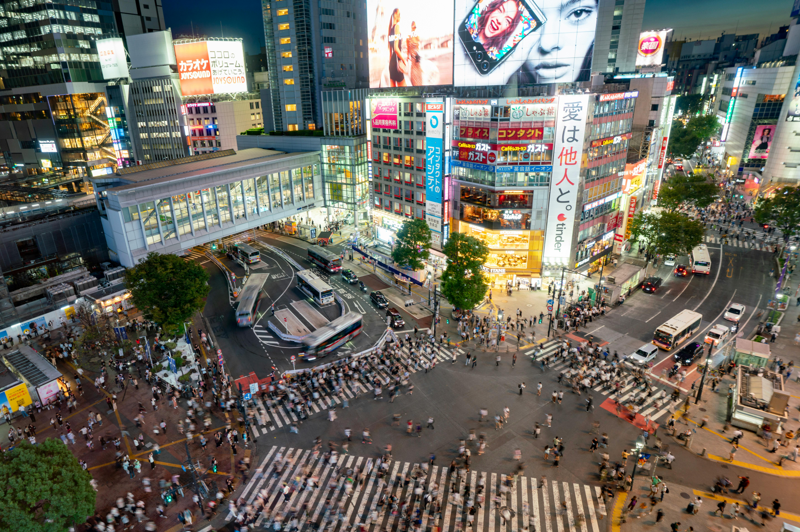

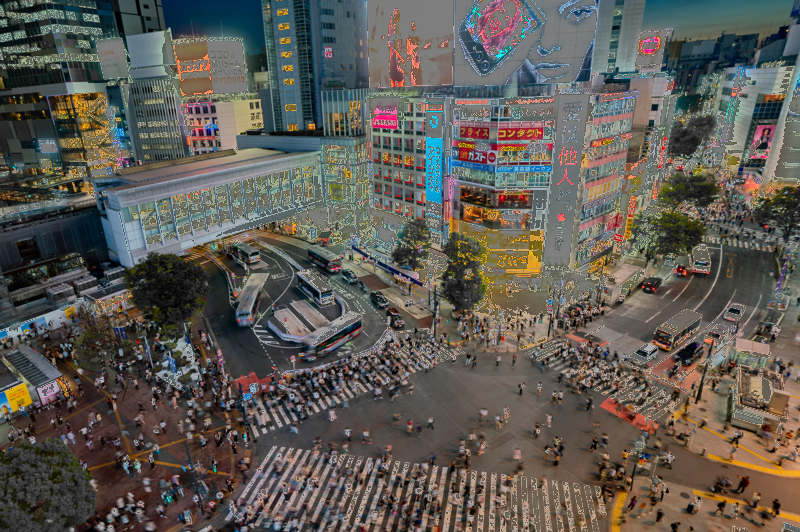

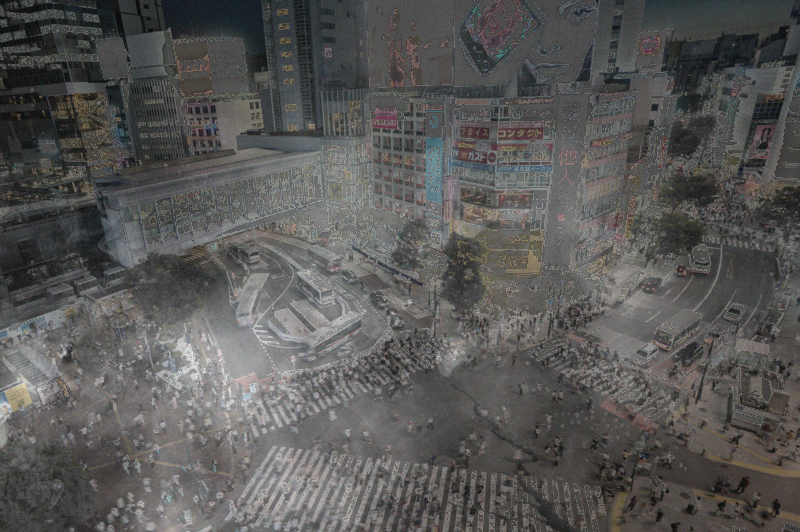

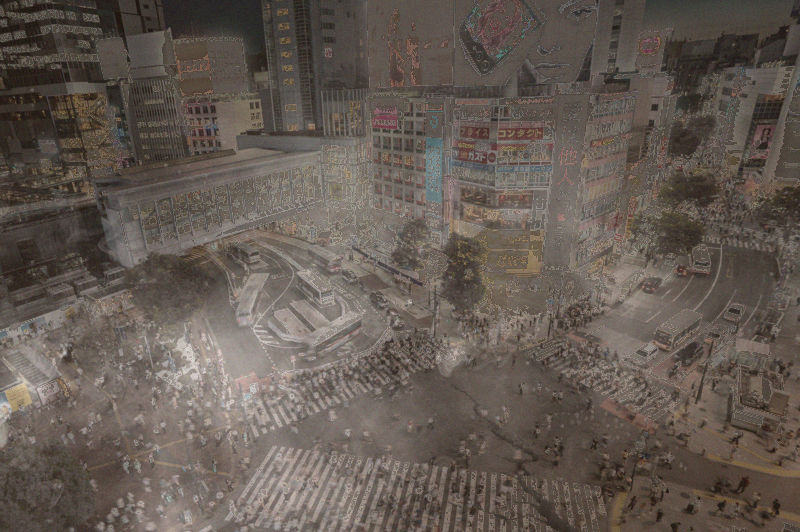

In [ ]:
# THE STREETS AFTER BOMBING

from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import numpy as np

crossing = Image.open('photos/shibuya_crossing1.jpg')
crossing.thumbnail((800,800))
display(crossing)

# Mask the lit up screens to reduce the brightness so that it looks broken already.
pixels = crossing.load()

for i in range(crossing.width):
    for j in range(crossing.height):
        r, g, b = pixels[i, j]

        brightness = 0.299 * r + 0.587 * g + 0.114 * b

        if brightness > 180:
            # Reduce brightness
            r = int(r * 0.5)
            g = int(g * 0.5)
            b = int(b * 0.5)

        if g > r * 1.2 and g > b * 1.2:
            # Reduce the saturation by blending with grayscale
            gray = int(0.299 * r + 0.587 * g + 0.114 * b)
            desaturation_factor = 0  # Adjust this value for more or less desaturation

            r = int(r * desaturation_factor + gray * (1 - desaturation_factor))
            g = int(g * desaturation_factor + gray * (1 - desaturation_factor))
            b = int(b * desaturation_factor + gray * (1 - desaturation_factor))

        pixels[i, j] = (r, g, b)

display(crossing)

# Add land crack
landCrack = Image.open('photos/land_crack_long.png').convert("RGBA")
landCrack.thumbnail((160,160))
landCrack = landCrack.transpose(Image.FLIP_LEFT_RIGHT)
  # Reduce brightnes of crack (make it grey)
r, g, b, alpha = landCrack.split()
rgb_image = Image.merge("RGB", (r, g, b))
enhancer = ImageEnhance.Brightness(rgb_image)
darker_rgb_image = enhancer.enhance(0.3)
darker_landCrack = Image.merge("RGBA", (*darker_rgb_image.split(), alpha))
  # Reduce transparency of crack
alpha_channel = darker_landCrack.split()[3]
alpha_channel = alpha_channel.point(lambda p: p * 0.9)
darker_landCrack.putalpha(alpha_channel)
  # Rotate the crack
darker_landCrack = darker_landCrack.rotate(-10, expand=False)
# display(darker_landCrack)
  # Paste the land crack onto the pucture
crossing.paste(darker_landCrack, (440, (crossing.height-landCrack.height)), darker_landCrack)
# display(crossing)

# Decrease saturation
filter = ImageEnhance.Color(crossing)
crossing = filter.enhance(0.4)

# Add noise for dust/debris
noise = np.random.randint(0, 30, (crossing.size[1], crossing.size[0], 3), dtype='uint8')
crossing = Image.fromarray(np.clip(np.array(crossing) + noise, 0, 255).astype('uint8'))

# display(noisy_image)

# Add smoke overlay
red_smoke_overlay = Image.open('photos/red_smoke.png')
red_smoke_overlay = red_smoke_overlay.resize((crossing.width,crossing.height))
  # Flip vertical
red_smoke_overlay = red_smoke_overlay.transpose(Image.FLIP_TOP_BOTTOM)
red_smoke_overlay = red_smoke_overlay.transpose(Image.FLIP_LEFT_RIGHT)
  # Decrease saturation
smoke_filter = ImageEnhance.Color(red_smoke_overlay)
red_smoke_overlay = smoke_filter.enhance(0)
  # Increase brightness to make the smoke more emphasized
smoke_enhancer = ImageEnhance.Brightness(red_smoke_overlay)
red_smoke_overlay = smoke_enhancer.enhance(1.5)
  # Blend the orange-filtered image with the modified smoke overlay
crossing = Image.blend(crossing, red_smoke_overlay, alpha=0.5)
display(crossing)


# Add colour filter
orange_overlay = Image.new("RGB", crossing.size, (210, 116, 52))
crossing = Image.blend(crossing, orange_overlay, alpha=0.1)
display(crossing);
crossing.save('output/shibuya_crossing.png')





In [ ]:
# RED BLOTCH

from PIL import Image, ImageEnhance, ImageOps, ImageFilter
import numpy as np

# Get smoke overlay and resize
red_smoke_overlay = Image.open('drive/MyDrive/Colab Notebooks/ISE/ASM/red_smoke.png')
red_smoke_overlay = red_smoke_overlay.resize((orange_filtered_image.width,orange_filtered_image.height))

# Convert to rgba
red_smoke_overlay = red_smoke_overlay.convert("RGBA")

# Remove backgorund
datas = red_smoke_overlay.getdata()
new_data = []
for item in datas:
    # Keep only the red-colored smoke (adjust the threshold as needed)
    red, green, blue, alpha = item
    if red > 100 and green < 60 and blue < 60:
        # Keep the red smoke pixel
        new_data.append((red, green, blue, 70))
    else:
        # Make non-red areas transparent
        new_data.append((0, 0, 0, 0))

# Update the smoke overlay with transparency applied
red_smoke_overlay.putdata(new_data)
smoke_filter = ImageEnhance.Color(red_smoke_overlay)
red_smoke_overlay = smoke_filter.enhance(0.5)


overlayed_image = Image.alpha_composite(orange_filtered_image, red_smoke_overlay)
display(overlayed_image)


ValueError: image has wrong mode